In [ ]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_derivative(x):
    return np.exp(-x)/(np.exp(-x)+1)**2
def cost_computation(y, yhat):
    m = y.shape[1]  # number of samples
    epsilon = 1e-8  # to avoid log(0)
    logprobs = -(1/m) * np.sum(y * np.log(yhat + epsilon) + (1 - y) * np.log(1 - yhat + epsilon))
    return logprobs
lr=0.1
xor_input=np.array([[0,0],[0,1],[1,0],[1,1]])
print(xor_input)
xor_output=np.array([[0,1,1,0]])
X=xor_input.T
Y=xor_output
print(X.shape)
output_dim=len(Y.T)
print(output_dim)
n0,m=X.shape
n1=5
W1=np.random.random((n1,n0))
b1=np.zeros((n1,1))
n2=1
W2=np.random.random((n2,n1))
b2=np.zeros((n2,1))
NumOfEpochs=20000
cost=[]
for epoch in range(NumOfEpochs):
    #forward propagation
    Z1=np.dot(W1,X)+b1
    A1=sigmoid(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)

    cost.append(np.squeeze(cost_computation(Y,A2)))

    #back propagation

    dZ2=A2-Y
    dW2=(1/m)*np.dot(dZ2,A1.T)
    db2=np.sum(dZ2,axis=1,keepdims=True)
    dZ1=np.multiply(np.dot(W2.T,dZ2),(A1*(1-A1)))
    dW1=(1/m)*np.dot(dZ1,X.T)
    db1=(1/m)*np.sum(dZ1,axis=1,keepdims=True)

    W1=W1-lr*dW1
    W2=W2-lr*dW2
    b1=b1-lr*db1
    b2=b2-lr*db2
print(A2)
def  predict(W1,W2,b1,b2,X):
    Z1=np.dot(W1,X)+b1
    A1=sigmoid(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)
    predictions=np.round(A2)

    return predictions

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
(2, 4)
4
[[0.00611285 0.99513362 0.99510159 0.00436193]]


(20000,)


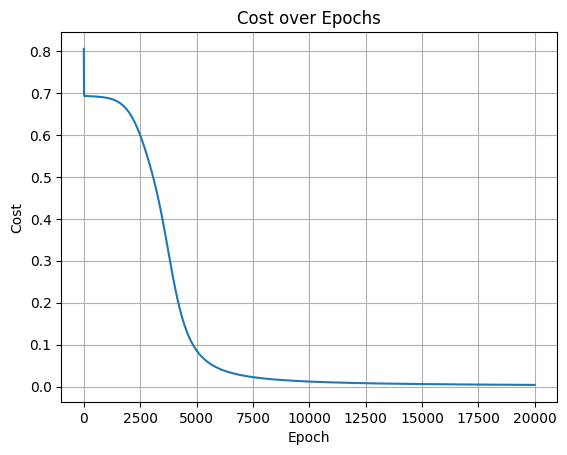

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# After training
cost = np.array(cost)  # 'costs' should have been collecting cost values each epoch
print(cost.shape)       # should be (NumOfEpochs,)
plt.plot(cost)
plt.title("Cost over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

(1, 2500)
(50, 50)
Y labels: [[0 1 1 0]]


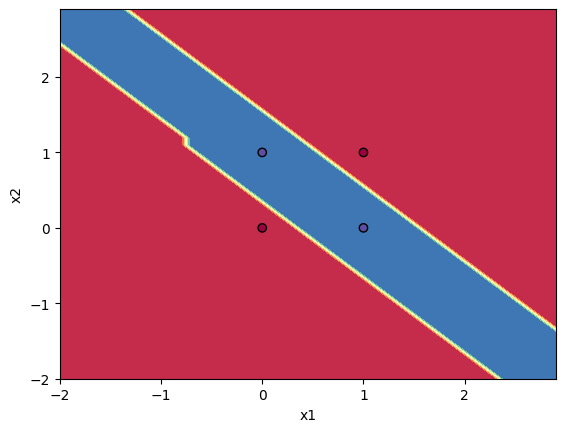

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
h = 0.1
x_min, x_max = X[0, :].min() - 2, X[0, :].max() + 2
y_min, y_max = X[1, :].min() - 2, X[1, :].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

Xn = np.c_[xx.ravel(), yy.ravel()].T
p = predict(W1, W2, b1, b2, Xn)
print(p.shape)
p = p.reshape(xx.shape)
print(p.shape)
plt.contourf(xx, yy, p, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[0, :], X[1, :], c=Y.flatten(), cmap=plt.cm.Spectral, edgecolors='k')
print("Y labels:", Y)
plt.show()